# **Part - 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  

In [3]:
# Path to Datasets
# Training Path
train_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/caries"
train_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/no-caries"

# Testing Path 
valid_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/caries"
valid_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/no-caries"

# Testing Path 
test_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/caries"
test_no_caries_path = "/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/no-caries"

In [4]:
# Making Directory of Images
# Training Images
train_caries_image = os.listdir(train_caries_path)
train_no_caries_image = os.listdir(train_no_caries_path)

#Validation Images
valid_caries_image = os.listdir(valid_caries_path)
valid_no_caries_image = os.listdir(valid_no_caries_path)

#Testing Images
test_caries_image = os.listdir(test_caries_path)
test_no_caries_image = os.listdir(test_no_caries_path)

In [5]:
# Printing Numbers of Images in each Dataset
print("Number of Caries Images in Training = ",len(train_caries_image))
print("Number of No Caries Images in Training = ",len(train_no_caries_image))

print('\n')
print("Number of Caries Images in Validation = ",len(valid_caries_image))
print("Number of No Caries Images in Validation = ",len(valid_no_caries_image))

print('\n')
print("Number of Caries Images in Testing = ",len(test_caries_image))
print("Number of No Caries Images in Testing = ",len(test_no_caries_image))

Number of Caries Images in Training =  1526
Number of No Caries Images in Training =  629


Number of Caries Images in Validation =  972
Number of No Caries Images in Validation =  525


Number of Caries Images in Testing =  420
Number of No Caries Images in Testing =  166


# **Part - 2**

Training Data

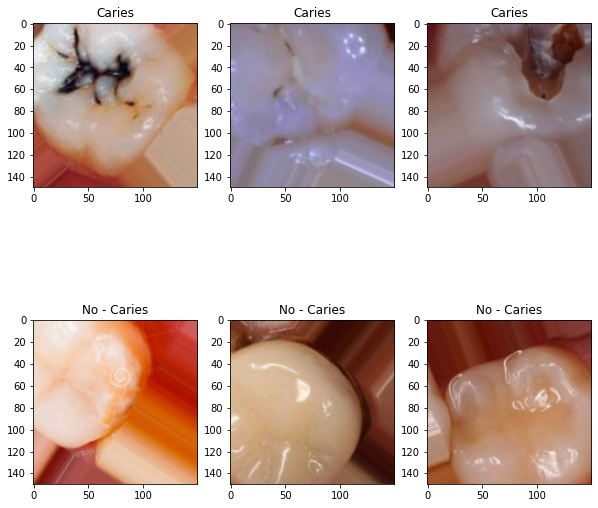

In [ ]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_caries_path + '/' + random.choice(train_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(train_no_caries_path + '/' + random.choice(train_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

Validation Data

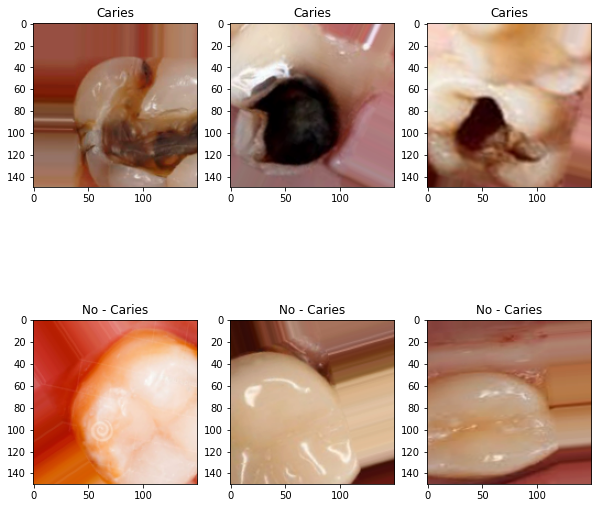

In [ ]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_caries_path + '/' + random.choice(valid_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(valid_no_caries_path + '/' + random.choice(valid_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

Test Data

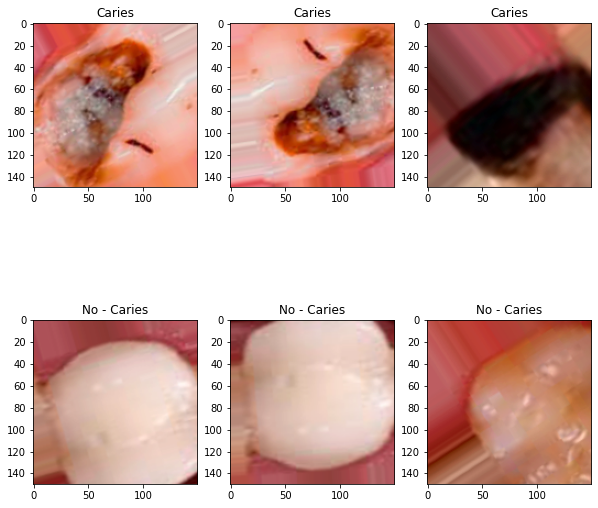

In [ ]:
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_caries_path + '/' + random.choice(test_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(test_no_caries_path + '/' + random.choice(test_no_caries_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

# **Part - 3**

Model

In [6]:
# Model
model=tf.keras.applications.efficientnet_v2.EfficientNetV2B3(weights='imagenet',include_top=False)
# Design new model
x=model.output
x=tf.keras.layers.GlobalMaxPool2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)  # This layer will have output. So It will have only one neuron
efficent_model=tf.keras.models.Model(inputs = model.input, outputs = preds)
opt=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
efficent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
efficent_model.summary()

52606240/52606240 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                             

In [7]:
for i,layer in enumerate(efficent_model.layers):
  print(i,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block1b_project_conv
10 block1b_project_bn
11 block1b_project_activation
12 block1b_drop
13 block1b_add
14 block2a_expand_conv
15 block2a_expand_bn
16 block2a_expand_activation
17 block2a_project_conv
18 block2a_project_bn
19 block2b_expand_conv
20 block2b_expand_bn
21 block2b_expand_activation
22 block2b_project_conv
23 block2b_project_bn
24 block2b_drop
25 block2b_add
26 block2c_expand_conv
27 block2c_expand_bn
28 block2c_expand_activation
29 block2c_project_conv
30 block2c_project_bn
31 block2c_drop
32 block2c_add
33 block3a_expand_conv
34 block3a_expand_bn
35 block3a_expand_activation
36 block3a_project_conv
37 block3a_project_bn
38 block3b_expand_conv
39 block3b_expand_bn
40 block3b_expand_activation
41 block3b_project_conv
42 block3b_project_bn
43 block3b_drop
44 block3b_add
45 block3c_expand_conv
46 block3c_expand_bn
47 block3c_

In [8]:
# set layers for training
#layer upto 419 is already trained

for layer in efficent_model.layers[:419]:
  layer.trainable=False
for layer in efficent_model.layers[419:]:
  layer.trainable=True

In [9]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data=train_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training",target_size=(150,150),class_mode='categorical', shuffle=True)

Found 2155 images belonging to 2 classes.


In [10]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation",target_size=(150,150),class_mode='categorical',shuffle=True)

Found 1497 images belonging to 2 classes.


In [11]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test",target_size=(224,224),class_mode='categorical',shuffle=True)

Found 586 images belonging to 2 classes.


In [12]:
train_data.class_indices

{'caries': 0, 'no-caries': 1}

In [13]:
valid_data.class_indices

{'caries': 0, 'no-caries': 1}

In [14]:
test_data.class_indices

{'caries': 0, 'no-caries': 1}

In [15]:
hist=efficent_model.fit(train_data, epochs=60,validation_data=valid_data)

Epoch 1/60
68/68 [==============================] - 221s 3s/step - loss: 0.6015 - accuracy: 0.7151 - val_loss: 0.3503 - val_accuracy: 0.8804
Epoch 2/60
68/68 [==============================] - 19s 279ms/step - loss: 0.3049 - accuracy: 0.8659 - val_loss: 0.1313 - val_accuracy: 0.9492
Epoch 3/60
68/68 [==============================] - 24s 350ms/step - loss: 0.1305 - accuracy: 0.9490 - val_loss: 0.0630 - val_accuracy: 0.9766
Epoch 4/60
68/68 [==============================] - 18s 269ms/step - loss: 0.0714 - accuracy: 0.9740 - val_loss: 0.0431 - val_accuracy: 0.9840
Epoch 5/60
68/68 [==============================] - 18s 264ms/step - loss: 0.0440 - accuracy: 0.9833 - val_loss: 0.0400 - val_accuracy: 0.9853
Epoch 6/60
68/68 [==============================] - 18s 260ms/step - loss: 0.0440 - accuracy: 0.9828 - val_loss: 0.0362 - val_accuracy: 0.9826
Epoch 7/60
68/68 [==============================] - 24s 347ms/step - loss: 0.0219 - accuracy: 0.9916 - val_loss: 0.0162 - val_accuracy: 0.9913
E

In [16]:
final_model=efficent_model.save("efficientnetv3b3.h5")

# **Part - 4**

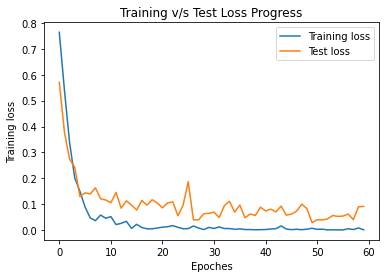

In [ ]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel("Epoches")
plt.ylabel("Training loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

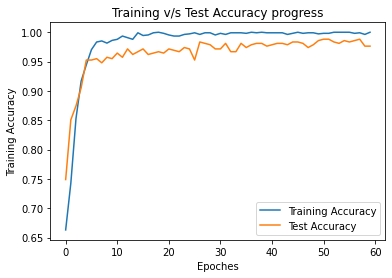

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Training Accuracy")
plt.title("Training v/s Test Accuracy progress")
plt.legend()

# **Part - 5**

Training Data

In [ ]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data_1 = train_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training",target_size=(150,150),class_mode='categorical',batch_size=32, shuffle=False)

Found 1080 images belonging to 2 classes.


In [ ]:
train_data_1.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Training Data
actual_train_class=train_data_1.classes
actual_valid_class=valid_data.classes
from sklearn.metrics import confusion_matrix
train_data_1.reset()
y_train_pred = efficent_model.predict(train_data_1)
y_train_pred =np.argmax(y_train_pred, axis=1)

34/34 [==============================] - 9s 158ms/step


1.0

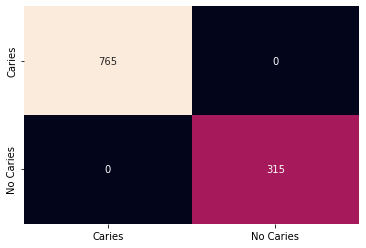

In [ ]:
cm = confusion_matrix(actual_train_class, y_train_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(actual_train_class, y_train_pred)

In [ ]:
print(classification_report(actual_train_class, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       315

    accuracy                           1.00      1080
   macro avg       1.00      1.00      1.00      1080
weighted avg       1.00      1.00      1.00      1080



In [ ]:
print(efficent_model.evaluate(train_data_1))

34/34 [==============================] - 3s 97ms/step - loss: 2.1784e-06 - accuracy: 1.0000
[2.1784255750390003e-06, 1.0]


Validation Data

In [ ]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data_1 = valid_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation",target_size=(150,150),class_mode='categorical',shuffle=False,batch_size=32)

Found 422 images belonging to 2 classes.


14/14 [==============================] - 1s 90ms/step


<Axes: >

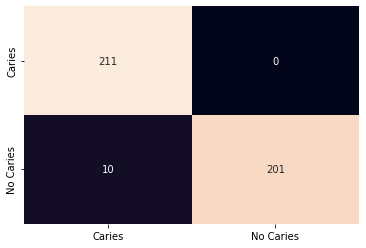

In [ ]:
actual_valid_class=valid_data_1.classes

y_valid_pred = efficent_model.predict(valid_data_1)
y_valid_pred =np.argmax(y_valid_pred, axis=1)

cm = confusion_matrix(actual_valid_class, y_valid_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

In [ ]:
print(classification_report(actual_valid_class, y_valid_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       211
           1       1.00      0.95      0.98       211

    accuracy                           0.98       422
   macro avg       0.98      0.98      0.98       422
weighted avg       0.98      0.98      0.98       422



In [ ]:
print(efficent_model.evaluate(valid_data_1))

14/14 [==============================] - 1s 93ms/step - loss: 0.0913 - accuracy: 0.9763
[0.09130892157554626, 0.9763033390045166]


Test Data

In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data_1 = test_generator.flow_from_directory("/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test",target_size=(150,150),class_mode='categorical',shuffle=False,batch_size=32)

Found 292 images belonging to 2 classes.


10/10 [==============================] - 47s 5s/step


<Axes: >

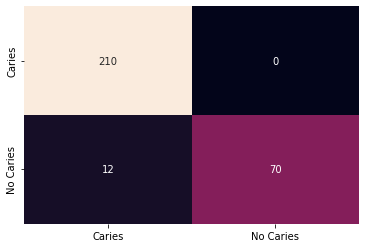

In [ ]:
actual_test_class=test_data_1.classes

y_test_pred = efficent_model.predict(test_data_1)
y_test_pred =np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(actual_test_class, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['Caries','No Caries'], yticklabels=['Caries','No Caries'],cbar=False)

In [ ]:
print(classification_report(actual_test_class, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       210
           1       1.00      0.85      0.92        82

    accuracy                           0.96       292
   macro avg       0.97      0.93      0.95       292
weighted avg       0.96      0.96      0.96       292



In [ ]:
print(efficent_model.evaluate(test_data_1))

10/10 [==============================] - 1s 121ms/step - loss: 0.1772 - accuracy: 0.9589
[0.1772354692220688, 0.9589040875434875]


# **Part - 6**

Training

1/1 [==============================] - 0s 38ms/step


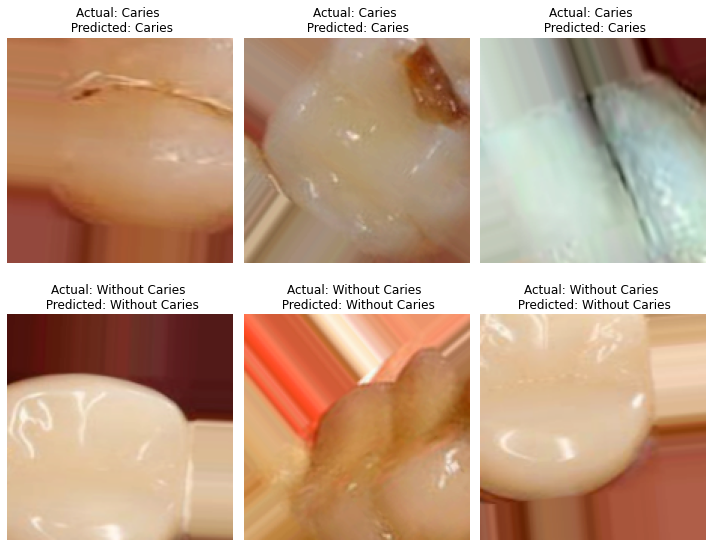

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in train_caries_image:
  if(i<=2):
    test_img=load_img(train_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in train_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(train_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Validation

1/1 [==============================] - 0s 39ms/step


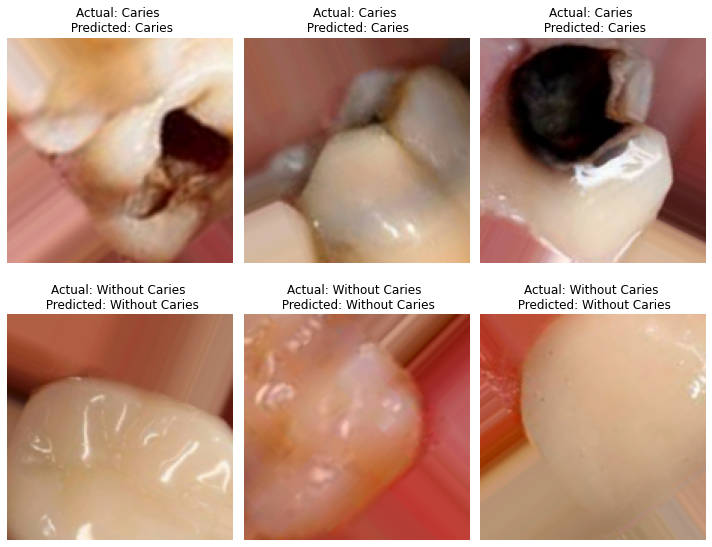

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in valid_caries_image:
  if(i<=2):
    test_img=load_img(valid_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in valid_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(valid_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

Test

1/1 [==============================] - 0s 66ms/step


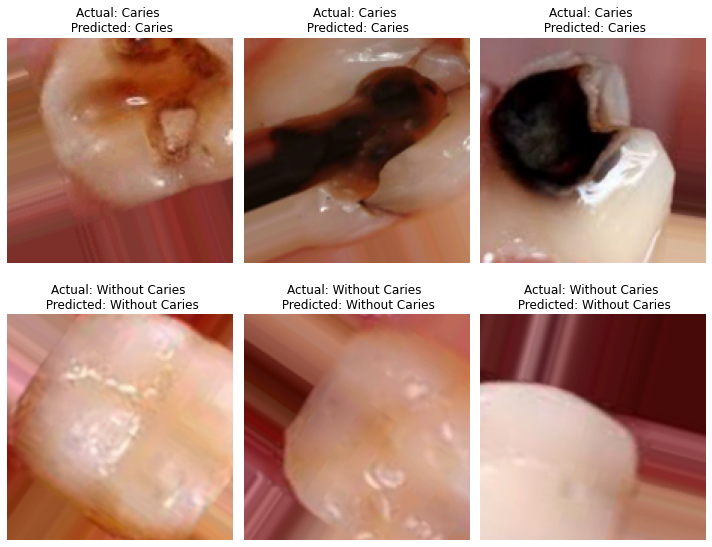

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in test_caries_image:
  if(i<=2):
    test_img=load_img(test_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
   
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in test_no_caries_image:
  if(i>2 and i <6):
    test_img=load_img(test_no_caries_path+'/'+j, target_size=(150,150))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,150,150,3)
  
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='Caries'
    elif pred==1:
      result='Without Caries'

    axes[i].set_title("Actual: Without Caries \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
 

fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

# **Part- 7**

In [17]:
pip install tf-keras-vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 6.9 MB/s eta 0:00:00


In [53]:
pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.9 MB/s eta 0:00:00


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tf_explain.core.grad_cam import GradCAM

def preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = tf.keras.applications.resnet.preprocess_input(image_array)
    return image_array

def generate_gradcam_visualization(model, image_path):
    image_array = preprocess_image(image_path)
    image_array = tf.convert_to_tensor(image_array)

    # Create Gradcam object
    gradcam = Gradcam(model, clone=False)

    # Define a loss function for Grad-CAM
    def loss(output):
        class_idx = np.argmax(output[0])
        return output[0][class_idx]

    # Generate cam with GradCAM
    cam = gradcam(loss, image_array, penultimate_layer=-1)
    cam = normalize(cam)

    # Load the original image
    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (150, 150))
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Visualize the Grad-CAM heatmap on the original image
    heatmap = cv2.resize(cam[0], (original_image.shape[1], original_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 0.6, heatmap, 0.4, 0)

    # Display the original image and Grad-CAM visualization side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_image)
    axs[0].axis('off')
    axs[0].set_title('Original Image')
    axs[1].imshow(superimposed_img)
    axs[1].axis('off')
    axs[1].set_title('Grad-CAM Visualization')
    plt.show()

Training - Caries

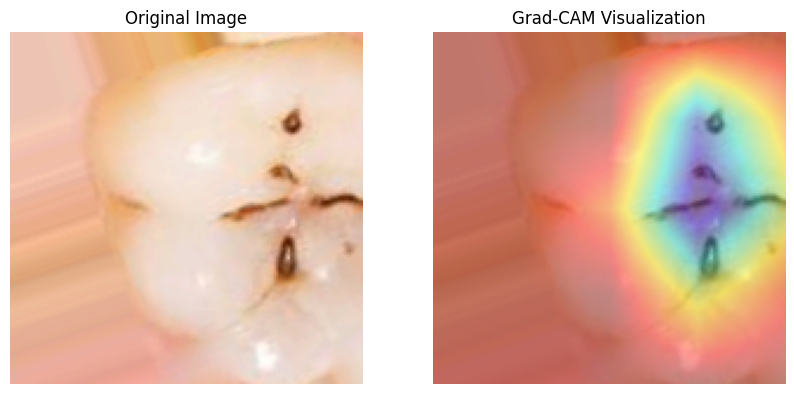

In [58]:
image_path = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/caries/aug_0_2719.png'
a = generate_gradcam_visualization(efficent_model, image_path)


Training - Without Caries

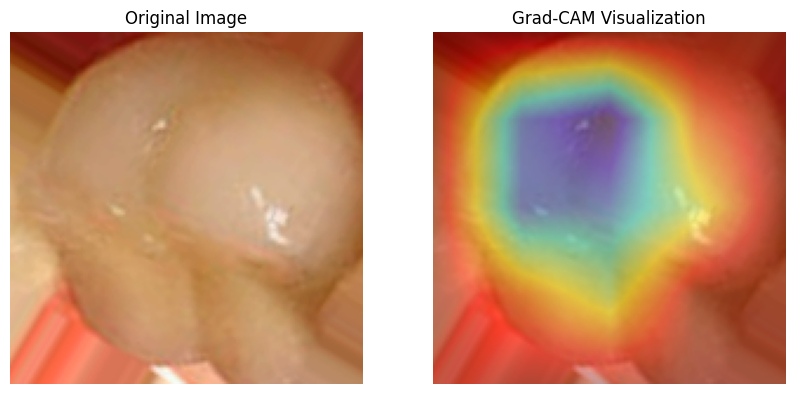

In [59]:
image_path_0 = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/training/no-caries/aug_0_20.png'
b = generate_gradcam_visualization(efficent_model, image_path_0)

Validation - Caries

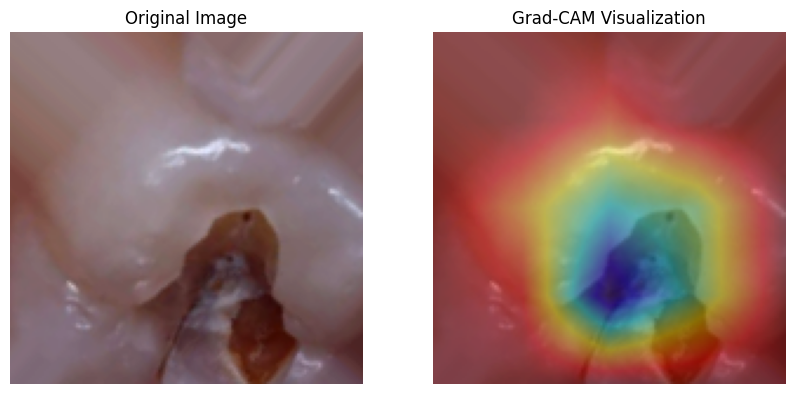

In [60]:
image_path_1 = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/caries/aug_1_9178.png'
c = generate_gradcam_visualization(efficent_model, image_path_1)

Validation - Without Caries

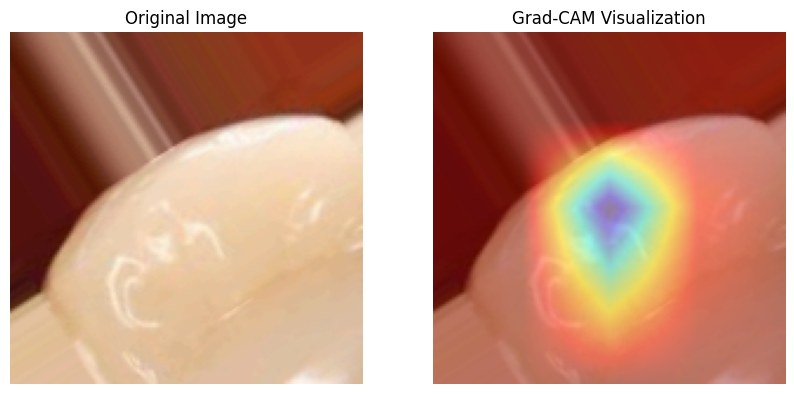

In [61]:
image_path_2 = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/validation/no-caries/aug_1_468.png'
d = generate_gradcam_visualization(efficent_model, image_path_2)

Test - Caries

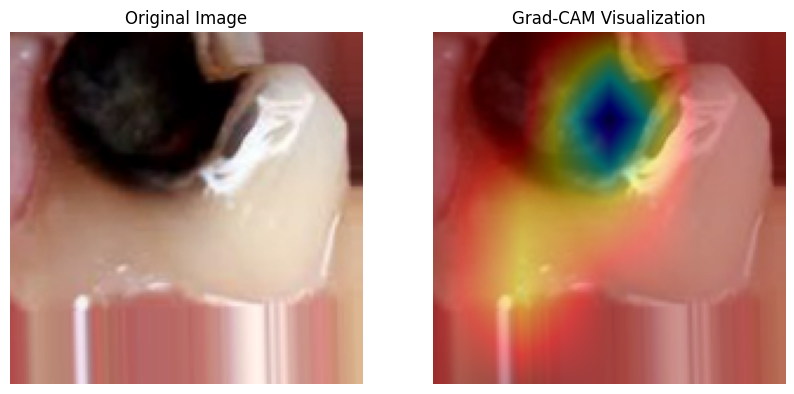

In [62]:
image_path_3 = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/caries/aug_0_1878.png'
e = generate_gradcam_visualization(efficent_model, image_path_3)

Test - Without Caries

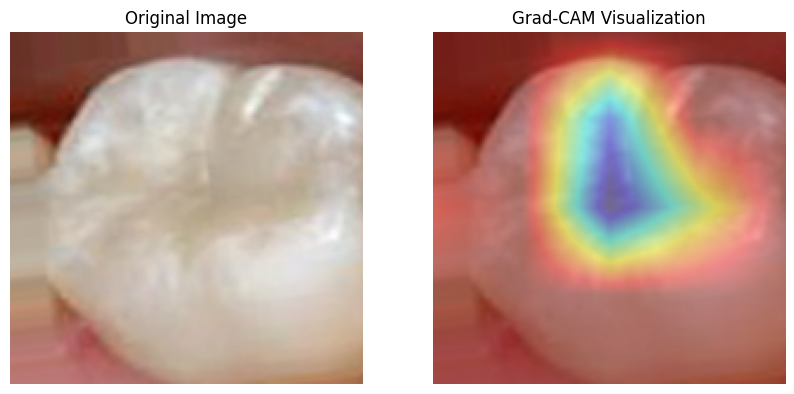

In [63]:
image_path_4 = '/content/drive/MyDrive/teeth_dataset/Augmented/teeth_dataset/test/no-caries/aug_0_1874.png'
f = generate_gradcam_visualization(efficent_model, image_path_4)